# Exercise 1 - (E4.6)

Let us start by importing the required modules:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Activation function
from utilities.activation_functions import hardlims

The four categories of vectors are saved as variables:

In [2]:
cat_1 = list(map(np.array, [[-1, 1], [-1, 0]]))
cat_2 = list(map(np.array, [[0, 2], [1, 2]]))
cat_3 = list(map(np.array, [[2, 0], [2, 1]]))
cat_4 = list(map(np.array, [[1, -1], [0, -1]]))

## Point 1
The implementation of a two-neuron network is reported below. The network is then utilized to predict which category each vector belongs to. To correctly classify the 8 vectors, weights and biases were graphically chosen in order to distinguish the 4 categories:

$$
\begin{equation}
\textbf{W} = \begin{bmatrix}
1 & 1 \\
-1 & 1 \\
\end{bmatrix}
\end{equation} , \,\,\, \textbf{B} = \begin{bmatrix}
-1 \\
0
\end{bmatrix}
$$

The following code cell performs the prediction and compares it with the actual categories:

In [3]:
# Layer weight matrix and bias array
W = np.array([[1, 1], [-1, 1]])        # Size = (number of neurons, input size)
B = np.array([[-1, 0]]).transpose()    # Size = (number of neurons, 1)

# Layer output function
def predict(p: np.ndarray, W_fun: np.ndarray, B_fun: np.ndarray):
    return hardlims(np.dot(W_fun, p.reshape(-1, 1)) + B_fun)

# Data pre-processing
y_data = np.array([1, 1, 2, 2, 3, 3, 4, 4])  # Real categories
x_data = np.empty((0, 2))
for cat in [cat_1, cat_2, cat_3, cat_4]:
    x_data = np.vstack((x_data, [*cat]))

# Predict
y_pred = np.empty((0, 2))
for row in x_data:
    y_pred = np.vstack((y_pred, predict(row, W, B).reshape(1, -1)))

# Post-processing
# Define a function to map each row to a number from 1 to 4 corresponding to each category
def map_row(row_arr):
    if np.array_equal(row_arr, [-1, 1]):
        return 1
    elif np.array_equal(row_arr, [1, 1]):
        return 2
    elif np.array_equal(row_arr, [1, -1]):
        return 3
    else:
        return 4

# Apply the function to each row of the array
y_pred_cat = np.apply_along_axis(map_row, axis=1, arr=y_pred)

print("Real categories:      ", y_data)
print("Predicted categories: ", y_pred_cat)
print("Error:                ", y_data-y_pred_cat)

Real categories:       [1 1 2 2 3 3 4 4]
Predicted categories:  [1 1 2 2 3 3 4 4]
Error:                 [0 0 0 0 0 0 0 0]


As can be seen the network is able to correctly predict each vector's category.

The decision boundaries in the input space can be obtained by recalling that:

$$\begin{align}
p_{2} \, \left(p_{1}\right) = -\frac{1}{w_{i, 2}} \left(w_{i, 1} \cdot p_{1} + b_i\right)
\end{align}$$

where $i$ is the neuron number.

By considering $p_1$ as independent variable and varying it, it is possible to sketch the two decision boundaries:

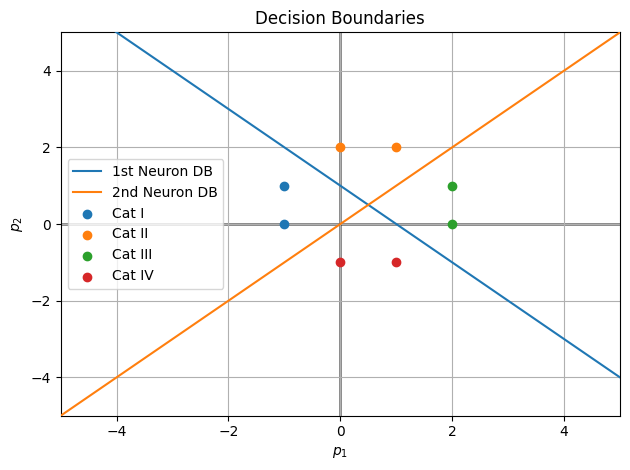

In [4]:
# Input space plot for each neuron
p1 = np.linspace(-5, 5, 1000)
_, ax = plt.subplots()
ax.grid(True)

# First neuron
p21 = (1/W[0, 1]) * (-W[0, 0]*p1 - B[0])
ax.plot(p1, p21, label="1st Neuron DB", zorder=5)

# Second neuron
p22 = (1/W[1, 1]) * (-W[1, 0]*p1 - B[1])
ax.plot(p1, p22, label="2nd Neuron DB", zorder=5)

# Scatter points
ax.scatter(*list(zip(*cat_1)), label="Cat I", zorder=5)
ax.scatter(*list(zip(*cat_2)), label="Cat II", zorder=5)
ax.scatter(*list(zip(*cat_3)), label="Cat III", zorder=5)
ax.scatter(*list(zip(*cat_4)), label="Cat IV", zorder=5)

# Plot options
ax.set_xlabel(r"$p_1$")
ax.set_ylabel(r"$p_2$")

# Origin axis
ax.axhline(y=0, lw=2, color='k', alpha=0.5, zorder=0)
ax.axvline(x=0, lw=2, color='k', alpha=0.5, zorder=0)

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# More options
ax.legend()
plt.title("Decision Boundaries")
plt.tight_layout()
plt.show()

With this choice of weights and biases the neural network can correctly classify each vector, i.e. each category's points are fully separated by the decision boundaries.

## Point 2

The diagram of the neural network used is showed hereafter:<br>
<br>


<div style="text-align:center;">
    <img src="https://i.ibb.co/DDYkRTK/network-diagram.png" width="50%" height="50%" />
</div>


## Point 3

Let's consider the new variables required to solve the problem (i.e. the same as before with the addition of a Category-I vector):

In [5]:
# Updated categories
cat_1 = list(map(np.array, [[-1, 1], [-1, 0], [-1, -3]]))
cat_2 = list(map(np.array, [[0, 2], [1, 2]]))
cat_3 = list(map(np.array, [[2, 0], [2, 1]]))
cat_4 = list(map(np.array, [[1, -1], [0, -1]]))

# Updated x_data and y_data (now 3 cat I vectors)
y_data = np.array([[-1, 1], [-1, 1], [-1, 1], [1, 1], [1, 1], [1, -1], [1, -1], [-1, -1], [-1, -1]])
y_data_cat = np.array([1, 1, 1, 2, 2, 3, 3, 4, 4])
x_data = np.empty((0, 2))
for cat in [cat_1, cat_2, cat_3, cat_4]:
    x_data = np.vstack((x_data, [*cat]))

x_data.shape

(9, 2)

Recalling the perceptron learning rule:

$$
\begin{align}
    \textbf{W}_{new} &= \textbf{W}_{old} + \alpha \cdot \left(\textbf{e}^T \textbf{p} \right) \\
    \textbf{B}_{new} &= \textbf{B}_{old} + \alpha \cdot \textbf{e}^T
\end{align}$$

This rule is implemented in the following code cell, a single iteration is performed for which a learning rate $\alpha$ of 1 was set:

In [6]:
# Iterate the training procedure over training data
alpha = 1       # Learning rate
iterations = 1  # Number of training iterations
for _ in range(iterations):
    for i in range(len(x_data)):
        # Predict
        y_pred_step = predict(x_data[i, :], W, B).reshape(1, -1)

        # Compute errors (target - prediction)
        error_step: np.ndarray = (y_data[i].reshape(1, -1) - y_pred_step)
        print(i+1, "- Misclassification error:", error_step, "Predicted: ", y_pred_step, "Real: ", y_data[i].reshape(1, -1))

        # Update weights and biases
        W = W + alpha*np.dot(error_step.transpose(), x_data[i, :].reshape(1, -1))
        B = B + alpha*error_step.transpose()

print("\nUpdated W:\n", W, "\n\nUpdated B:\n", B)

1 - Misclassification error: [[0 0]] Predicted:  [[-1  1]] Real:  [[-1  1]]
2 - Misclassification error: [[0 0]] Predicted:  [[-1  1]] Real:  [[-1  1]]
3 - Misclassification error: [[0 2]] Predicted:  [[-1 -1]] Real:  [[-1  1]]
4 - Misclassification error: [[0 2]] Predicted:  [[ 1 -1]] Real:  [[1 1]]
5 - Misclassification error: [[0 2]] Predicted:  [[ 1 -1]] Real:  [[1 1]]
6 - Misclassification error: [[ 0 -2]] Predicted:  [[1 1]] Real:  [[ 1 -1]]
7 - Misclassification error: [[0 0]] Predicted:  [[ 1 -1]] Real:  [[ 1 -1]]
8 - Misclassification error: [[0 0]] Predicted:  [[-1 -1]] Real:  [[-1 -1]]
9 - Misclassification error: [[ 0 -2]] Predicted:  [[-1  1]] Real:  [[-1 -1]]

Updated W:
 [[ 1.  1.]
 [-5.  5.]] 

Updated B:
 [[-1]
 [ 2]]


We can finally plot the new decision boundaries, the code adopted before is therefore re-used here:

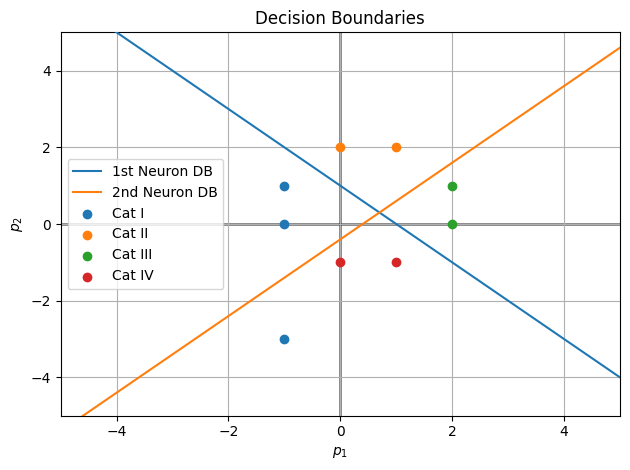

In [7]:
# Input space plot for each neuron
p1 = np.linspace(-5, 5, 1000)
_, ax = plt.subplots()
ax.grid(True)

# First neuron
p21 = (1/W[0, 1]) * (-W[0, 0]*p1 - B[0])
ax.plot(p1, p21, label="1st Neuron DB", zorder=5)

# Second neuron
p22 = (1/W[1, 1]) * (-W[1, 0]*p1 - B[1])
ax.plot(p1, p22, label="2nd Neuron DB", zorder=5)

# Scatter points
ax.scatter(*list(zip(*cat_1)), label="Cat I", zorder=5)
ax.scatter(*list(zip(*cat_2)), label="Cat II", zorder=5)
ax.scatter(*list(zip(*cat_3)), label="Cat III", zorder=5)
ax.scatter(*list(zip(*cat_4)), label="Cat IV", zorder=5)

# Plot options
ax.set_xlabel(r"$p_1$")
ax.set_ylabel(r"$p_2$")

# Origin axis
ax.axhline(y=0, lw=2, color='k', alpha=0.5, zorder=0)
ax.axvline(x=0, lw=2, color='k', alpha=0.5, zorder=0)

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# More options
ax.legend()
plt.title("Decision Boundaries")
plt.tight_layout()
plt.show()

After one iteration, the newly added point is still misclassified.

More iterations can be carried out to improve this result, in this case we set $\alpha=0.1$ to obtain a more stable convergence while the number of iterations is set to 4, thus bringing the total of iterations performed to 5:

In [8]:
# Iterate the training procedure over training data
alpha = 0.1       # Learning rate
iterations = 4    # Number of training iterations
for _ in range(iterations):
    for i in range(len(x_data)):
        # Predict
        y_pred_step = predict(x_data[i, :], W, B).reshape(1, -1)

        # Compute errors (target - prediction)
        error_step: np.ndarray = (y_data[i].reshape(1, -1) - y_pred_step)
        print(i+1, "- Misclassification error:", error_step, "Predicted: ", y_pred_step, "Real: ", y_data[i].reshape(1, -1))

        # Update weights and biases
        W = W + alpha*np.dot(error_step.transpose(), x_data[i, :].reshape(1, -1))
        B = B + alpha*error_step.transpose()

print("\nUpdated W:\n", W, "\n\nUpdated B:\n", B)

1 - Misclassification error: [[0 0]] Predicted:  [[-1  1]] Real:  [[-1  1]]
2 - Misclassification error: [[0 0]] Predicted:  [[-1  1]] Real:  [[-1  1]]
3 - Misclassification error: [[0 2]] Predicted:  [[-1 -1]] Real:  [[-1  1]]
4 - Misclassification error: [[0 0]] Predicted:  [[1 1]] Real:  [[1 1]]
5 - Misclassification error: [[0 0]] Predicted:  [[1 1]] Real:  [[1 1]]
6 - Misclassification error: [[0 0]] Predicted:  [[ 1 -1]] Real:  [[ 1 -1]]
7 - Misclassification error: [[0 0]] Predicted:  [[ 1 -1]] Real:  [[ 1 -1]]
8 - Misclassification error: [[0 0]] Predicted:  [[-1 -1]] Real:  [[-1 -1]]
9 - Misclassification error: [[0 0]] Predicted:  [[-1 -1]] Real:  [[-1 -1]]
1 - Misclassification error: [[0 0]] Predicted:  [[-1  1]] Real:  [[-1  1]]
2 - Misclassification error: [[0 0]] Predicted:  [[-1  1]] Real:  [[-1  1]]
3 - Misclassification error: [[0 2]] Predicted:  [[-1 -1]] Real:  [[-1  1]]
4 - Misclassification error: [[0 0]] Predicted:  [[1 1]] Real:  [[1 1]]
5 - Misclassification er

Plotting the decision boundaries again:

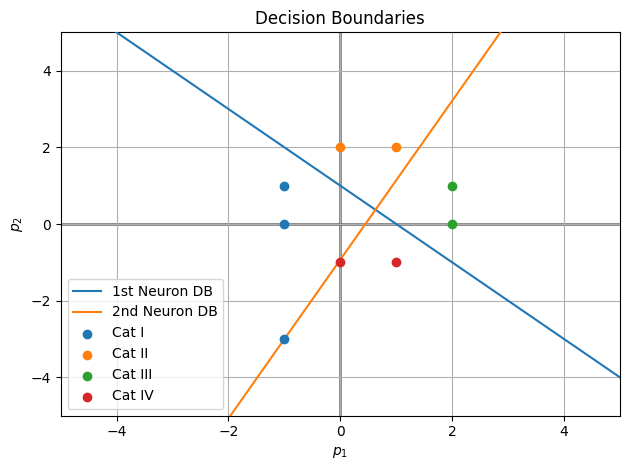

In [9]:
# Input space plot for each neuron
p1 = np.linspace(-5, 5, 1000)
_, ax = plt.subplots()
ax.grid(True)

# First neuron
p21 = (1/W[0, 1]) * (-W[0, 0]*p1 - B[0])
ax.plot(p1, p21, label="1st Neuron DB", zorder=5)

# Second neuron
p22 = (1/W[1, 1]) * (-W[1, 0]*p1 - B[1])
ax.plot(p1, p22, label="2nd Neuron DB", zorder=5)

# Scatter points
ax.scatter(*list(zip(*cat_1)), label="Cat I", zorder=5)
ax.scatter(*list(zip(*cat_2)), label="Cat II", zorder=5)
ax.scatter(*list(zip(*cat_3)), label="Cat III", zorder=5)
ax.scatter(*list(zip(*cat_4)), label="Cat IV", zorder=5)

# Plot options
ax.set_xlabel(r"$p_1$")
ax.set_ylabel(r"$p_2$")

# Origin axis
ax.axhline(y=0, lw=2, color='k', alpha=0.5, zorder=0)
ax.axvline(x=0, lw=2, color='k', alpha=0.5, zorder=0)

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# More options
ax.legend()
plt.title("Decision Boundaries")
plt.tight_layout()
plt.show()

The network now correctly classifies each point.